In [13]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

In [67]:
# load simd spatial and socio-economic data
SIMDspatial = gpd.read_file("sc_dz_11.shp").drop(["Name", "TotPop2011", "StdAreaHa", "Shape_Leng"], axis = 1)
SIMDcsv = pd.read_csv("simd2020_withinds.csv")

In [71]:
# rename column to left join
SIMDspatial = SIMDspatial.rename({'DataZone': 'Data_Zone_r'}, axis=1);

# left join on zone number and remove extraneous columns
SIMDmerged = SIMDcsv.merge(SIMDspatial,left_on='Data_Zone', right_on='Data_Zone_r', how='left')\
.drop(['Data_Zone_r', "Intermediate_Zone", "SIMD2020v2_Rank", \
    "SIMD2020v2_Vigintile", "SIMD_2020v2_Percentile", "SIMD2020v2_Quintile"], axis = 1)

# plotting from SIMD isn't working, so add column to plot from to spatial data dataframe
Access_Domain_Rank = SIMDmerged["SIMD2020_Access_Domain_Rank"]
SIMDspatial["Access_Domain_Rank"] = Access_Domain_Rank

# make the plot

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
ax1 = SIMDmerged.plot(column = "Access_Domain_Rank", ax = ax1)
ax1.set_axis_off()
ax1.title.set_text("Access Domain Rank")
#ax2.title.set_text("Population Density")
#ax2 = allData.plot(column = "Density", ax = ax2)
#ax2.set_axis_off()
plt.show()
fig.savefig("SIMD.png", dpi=300)

   Data_Zone   Council_area  Total_population  Working_Age_population  \
0  S01006506  Aberdeen City               894                     580   
1  S01006507  Aberdeen City               793                     470   
2  S01006508  Aberdeen City               624                     461   
3  S01006509  Aberdeen City               537                     307   
4  S01006510  Aberdeen City               663                     415   

   SIMD2020v2_Decile  SIMD2020v2_Income_Domain_Rank  \
0                  7                         3936.0   
1                  7                         4829.0   
2                  9                         4460.0   
3                  7                         3481.0   
4                  6                         3344.0   

   SIMD2020_Employment_Domain_Rank  SIMD2020_Health_Domain_Rank  \
0                           3220.0                         5174   
1                           4481.0                         5051   
2                           5

AttributeError: 'Line2D' object has no property 'column'

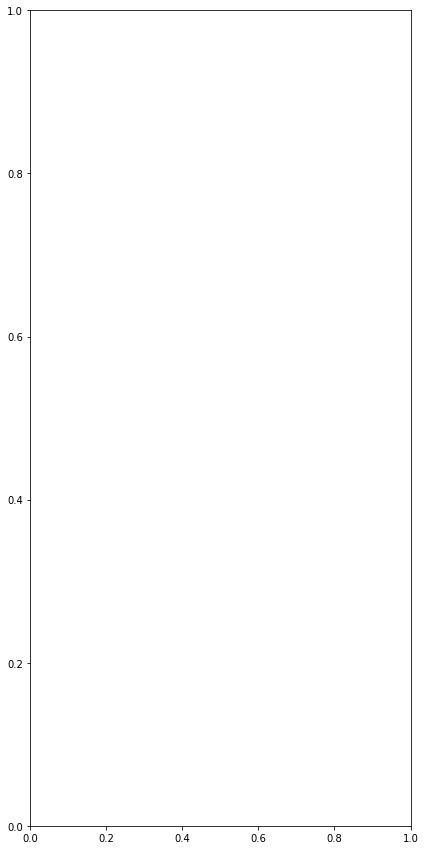